In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ml_metrics import rmsle

from IPython.display import display
import ipywidgets as widgets

from sklearn.cross_validation import train_test_split

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

import seaborn; seaborn.set()

%matplotlib inline

## Motivation

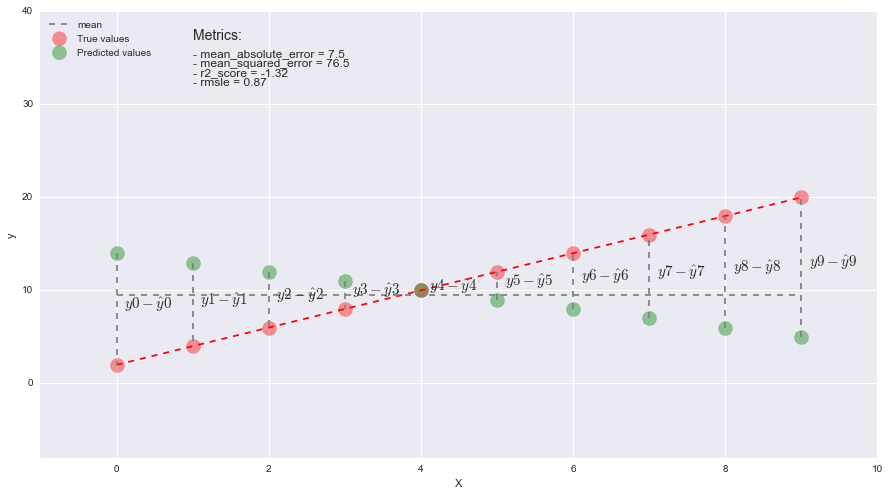

In [2]:
def plot_interactive(k, b):
    def ground_truth(x):
        """Ground truth -- function to approximate"""
        return x*2 + 2

    def gen_data(n_samples):
        """generate training and testing data"""
        np.random.seed(15)
        X = np.arange(n_samples)

        sign = np.array([pow(-1, np.random.randint(2) + 1) for x in range(n_samples)])
        offset = np.random.uniform(1, 10, size=n_samples) * sign

        f_pred = lambda x: k * x + b
        y_pred = f_pred(X)
        y_true = ground_truth(X)

        return X, y_pred, y_true

    X, y_pred, y_true = gen_data(10)

    metrics = [mean_absolute_error, mean_squared_error, r2_score, rmsle]

    def plot_data(alpha=0.4, s=200):
        fig = plt.figure(figsize=(15, 8))

        plt.plot(X, y_true, '--', c = 'r')
        plt.plot(X, [np.mean(y_pred)]*len(y_pred), '--', c = 'gray', label="mean")
        
        plt.scatter(X, y_true, s=s, alpha=alpha, color='r', label="True values")
        plt.scatter(X, y_pred, s=s, alpha=alpha, color='g', label="Predicted values")

        plt.xlim((0, 10))
        plt.ylabel('y')
        plt.xlabel('X')

        plt.legend( loc='upper left' )
        plt.xlim(-1, 10)
        plt.ylim(-8, 40)


        for i, x in enumerate(X):
            plt.plot([x, x], [y_pred[i], y_true[i]], ls='--', c = 'grey')
            plt.text(i + 0.1, y_pred[i] - (y_pred[i]-y_true[i]) / 2., "$y{0} - \hat y{0}$".format(i), fontsize=15)


        plt.text(1, 37, 'Metrics:', fontsize=14)
        for i, metric in enumerate(metrics):
            score = round(metric(y_true, y_pred), 2)
            plt.text(1, 35 - i, '- {0} = {1}'.format(metric.__name__, score), fontsize=12)

        plt.show()



    plot_data()
    


k = widgets.IntSlider(min=-2, max=5, value=-1)
b = widgets.IntSlider(min=-30, max=30, value=14)

w = widgets.interactive(plot_interactive,k=k, b=b)
display(w)

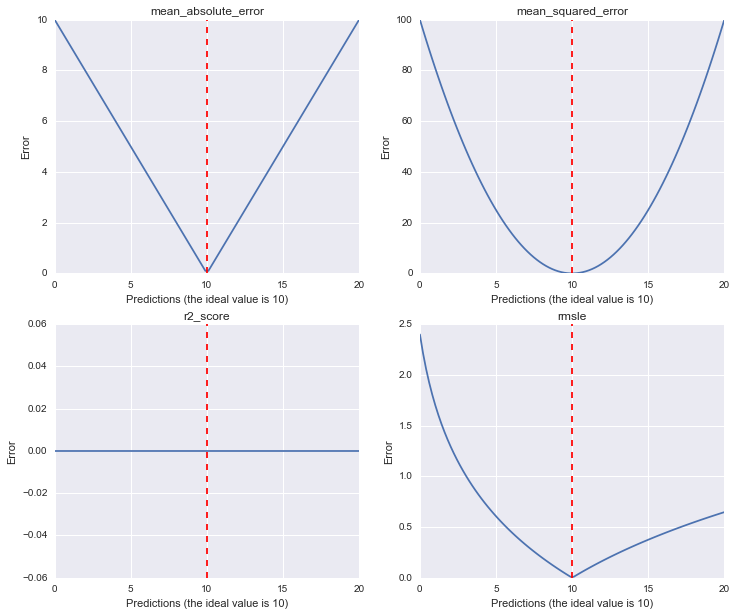

In [3]:
fig = plt.figure(figsize=(12, 10))

y_true = [10]
y_preds = np.linspace(0, 20, 100)
axs = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]

metrics = [mean_absolute_error, mean_squared_error, r2_score, rmsle]
for i, metric in enumerate(metrics):
    err    = [ metric(y_true, [y_pred]) for y_pred in y_preds ]
    
    axs[i].plot(y_preds, err)
    axs[i].set_xlabel("Predictions (the ideal value is {0})".format(y_true[0]))
    axs[i].set_ylabel("Error")
    axs[i].set_title(metric.__name__)
    axs[i].axvline(x=y_true[0],color='r',ls='dashed')


plt.show()

In [4]:
boston = load_boston()


model = LinearRegression()
model.fit(boston.data, boston.target)
y_pred = model.predict(boston.data)

metrics = [mean_absolute_error, mean_squared_error, r2_score, rmsle]
for metric in metrics:
    print(metric.__name__, metric(boston.target, y_pred))


('mean_absolute_error', 3.2729446379969387)
('mean_squared_error', 21.8977792176875)
('r2_score', 0.74060774286494269)
('rmsle', nan)
